<a href="https://colab.research.google.com/github/7sr7/Projs-in-AI-HW-4/blob/main/Silvestre_Projs_in_AI_HW_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Silvestre Ronin

Professor Mushtaque

PROJECTS IN AI & MACHINE LRNG - CSCI 4170 - 01

2025 07 10

TASK1 START

The following link is the dataset I have chosen:
https://www.kaggle.com/datasets/jp797498e/twitter-entity-sentiment-analysis

The reason this dataset was chosen was because it is sentiment analysis on social media posts. We need RNNs to solve this because the data is sequential, since order of the sentence may change the sentiment behind it. (expand on this...)

In [162]:
# installing packages...

!pip install gensim pyspellchecker

In [163]:
# importing required libraries...
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.preprocessing import Normalizer, StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
import itertools
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold, cross_validate
from sklearn.model_selection import cross_val_score
from scipy.stats import ttest_rel
from wordcloud import WordCloud
from collections import Counter
from gensim.models import KeyedVectors
from spellchecker import SpellChecker
from numpy import dot
from numpy.linalg import norm
import difflib
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from numpy.linalg import norm
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
import tensorflow as tf




import time
import warnings
warnings.filterwarnings("ignore")

In [164]:
# mounting to google drive...
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [165]:
# reading data sets...
trainingData = pd.read_csv('/content/drive/MyDrive/twitter_training.csv')
validationData = pd.read_csv('/content/drive/MyDrive/twitter_validation.csv')

In [166]:
# viewing the first few rows of the data...
trainingData.head()

2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...

In [167]:
# determining data size....
trainingData.shape

(74681, 4)

In [168]:
# validation data is very small... lets do train test split on the training data itself, so we have sufficient test data size...
# (still need to preprocess validation data in the same ways)...
validationData.shape

(999, 4)

In [169]:
# checking missing values...
trainingData.isna().sum()

2401                                                       0
Borderlands                                                0
Positive                                                   0
im getting on borderlands and i will murder you all ,    686
dtype: int64

In [170]:
# printing all the rows that have missing sentences...
nullRows = trainingData[trainingData.isnull().any(axis=1)]
print(nullRows)

       2401  Borderlands  Positive  \
60     2411  Borderlands   Neutral   
552    2496  Borderlands   Neutral   
588    2503  Borderlands   Neutral   
744    2532  Borderlands  Positive   
1104   2595  Borderlands  Positive   
...     ...          ...       ...   
73971  9073       Nvidia  Positive   
73972  9073       Nvidia  Positive   
74420  9154       Nvidia  Positive   
74421  9154       Nvidia  Positive   
74422  9154       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
60                                                   NaN     
552                                                  NaN     
588                                                  NaN     
744                                                  NaN     
1104                                                 NaN     
...                                                  ...     
73971                                                NaN     
73972                                          

In [171]:
# it does not make sense to keep these rows since you cant perform sentiment analysis on an empty sentence so drop them entirely...

trainingData = trainingData.dropna(subset=["im getting on borderlands and i will murder you all ,"])
trainingData = trainingData.reset_index(drop=True)

print(trainingData.shape)
trainingData.isna().sum()

(73995, 4)


2401                                                     0
Borderlands                                              0
Positive                                                 0
im getting on borderlands and i will murder you all ,    0
dtype: int64

In [172]:
validationData.isna().sum()

3364                                                                                                                                                                                                                                                  0
Facebook                                                                                                                                                                                                                                              0
Irrelevant                                                                                                                                                                                                                                            0
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    0
dtype: int64

In [173]:
# general information about the dataset...
trainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73995 entries, 0 to 73994
Data columns (total 4 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   2401                                                   73995 non-null  int64 
 1   Borderlands                                            73995 non-null  object
 2   Positive                                               73995 non-null  object
 3   im getting on borderlands and i will murder you all ,  73995 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


In [174]:
# statistics of the dataset (numeric columns)...
trainingData.describe()

2401
count  73995.000000
mean    6430.333685
std     3737.655932
min        1.000000
25%     3194.000000
50%     6418.000000
75%     9595.000000
max    13200.000000

In [175]:
# which columns have a missing value...?
trainingData.isnull().any(axis=0)

2401                                                     False
Borderlands                                              False
Positive                                                 False
im getting on borderlands and i will murder you all ,    False
dtype: bool

In [176]:
validationData.isnull().any(axis=0)

3364                                                                                                                                                                                                                                                  False
Facebook                                                                                                                                                                                                                                              False
Irrelevant                                                                                                                                                                                                                                            False
I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣    False
dtype: bool

In [177]:
# this shows me how each column is correlated to the other ones.

# i only have one column that is int, so it does not make sense to run VIF to see
# multicollinearity since it relies on numeric features.
# for this same reason, we cannot do visualization via heatmap or pairplot...
dataNum = trainingData.select_dtypes(include='number')
dataNum.corr()

2401
2401   1.0

In [178]:
# we are working more with string data so checking for token overlap is more beneficial...
duplicates = trainingData[trainingData.duplicated(subset=["im getting on borderlands and i will murder you all ,"], keep=False)]
print("Duplicates:\n", duplicates)

# counting...
print("Unique texts:", trainingData["im getting on borderlands and i will murder you all ,"].nunique())
print("Total rows:", len(trainingData))

Duplicates:
        2401  Borderlands  Positive  \
10     2402  Borderlands  Positive   
17     2404  Borderlands  Positive   
19     2404  Borderlands  Positive   
24     2405  Borderlands  Negative   
25     2405  Borderlands  Negative   
...     ...          ...       ...   
73929  9190       Nvidia  Positive   
73932  9190       Nvidia  Positive   
73934  9190       Nvidia  Positive   
73948  9193       Nvidia  Positive   
73949  9193       Nvidia  Positive   

      im getting on borderlands and i will murder you all ,  
10                                                   was     
17     that was the first borderlands session in a lo...     
19     that was the first borderlands session in a lo...     
24     The biggest disappointment of my life came a y...     
25     The biggest disappointment of my life came a y...     
...                                                  ...     
73929  This news about the Nvidia 3000 series is ligi...     
73932  This news about the Nvidia 

In [179]:
# the number of unique rows is less than the number of total rows, so we know that there exists some duplicates
# it is best to drop one of these duplicate rows so that model is not "memorizing"...
trainingData = trainingData.drop_duplicates(
    subset=["im getting on borderlands and i will murder you all ,"],
    keep="first"
).reset_index(drop=True)

trainingData.shape

(69490, 4)

In [180]:
# now for validation data set...

# we are working more with string data so checking for token overlap is more beneficial...
duplicates = validationData[validationData.duplicated(subset=["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"], keep=False)]
print("Duplicates:\n", duplicates)

# counting...
print("Unique texts:", validationData["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"].nunique())
print("Total rows:", len(validationData))

Duplicates:
      3364  Facebook Irrelevant  \
217  3263  Facebook   Positive   
962  4050     CS-GO   Positive   

    I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  
217                                                Wow                                                                                                                                                                                                  
962                                                Wow                                                                                                                                                                                                  
Unique texts: 998
Total rows: 999


In [181]:
# the number of unique rows is less than the number of total rows, so we know that there exists some duplicates
# it is best to drop one of these duplicate rows so that model is not "memorizing"...
validationData = validationData.drop_duplicates(
    subset=["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"],
    keep="first"
).reset_index(drop=True)

validationData.shape

(998, 4)

In [182]:
# seeing the actual breakdown of classification possible...
print(trainingData["Positive"].value_counts())

Positive
Negative      21166
Positive      19066
Neutral       17042
Irrelevant    12216
Name: count, dtype: int64


In [183]:
# keeping only positive and negative classifications since i want my sentiment analysis to be binary classification
# given how big the dataset is, i am comfortable doing this, since there are still many data observations to train the RNN on...
trainingData = trainingData[trainingData["Positive"].isin(["Positive", "Negative"])].copy()

# map to binary output...
trainingData["binOut"] = trainingData["Positive"].map({"Positive": 1, "Negative": 0})

print(trainingData["binOut"].value_counts())
print("\n")
print(trainingData["binOut"].value_counts(normalize=True) * 100)

binOut
0    21166
1    19066
Name: count, dtype: int64


binOut
0    52.609863
1    47.390137
Name: proportion, dtype: float64


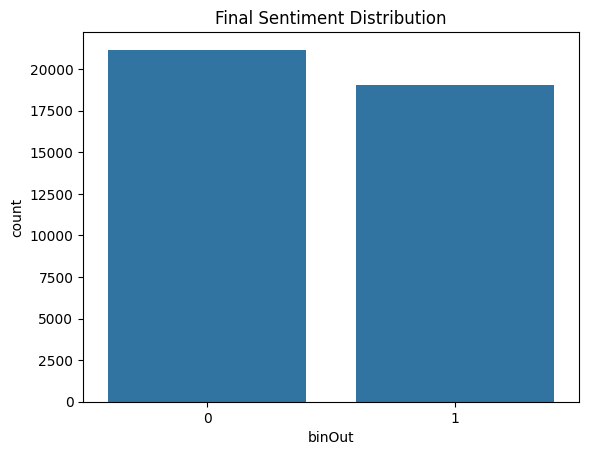

In [184]:
# visually showing that our labels are pretty evenly split, which is good since the data is not unbalanced...
sns.countplot(x="binOut", data=trainingData)
plt.title("Final Sentiment Distribution")
plt.show()

In [185]:
# now for validation...

# keeping only positive and negative classifications since i want my sentiment analysis to be binary classification
# given how big the dataset is, i am comfortable doing this, since there are still many data observations to train the RNN on...
validationData = validationData[validationData["Irrelevant"].isin(["Positive", "Negative"])].copy()

# map to binary output...
validationData["binOut"] = validationData["Irrelevant"].map({"Positive": 1, "Negative": 0})

print(validationData["binOut"].value_counts())
print("\n")
print(validationData["binOut"].value_counts(normalize=True) * 100)

binOut
1    276
0    266
Name: count, dtype: int64


binOut
1    50.922509
0    49.077491
Name: proportion, dtype: float64


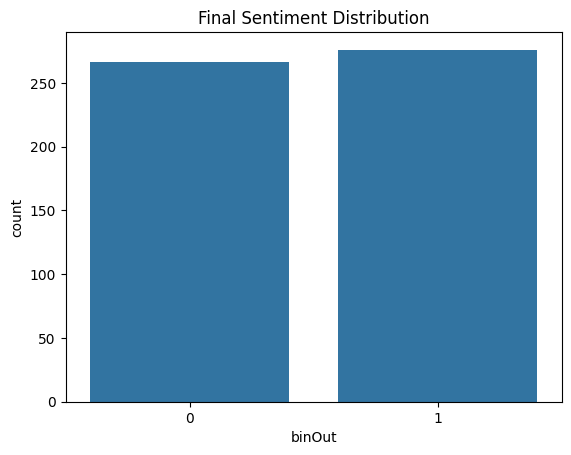

In [186]:
# visually showing that our labels are pretty evenly split, which is good since the data is not unbalanced...
sns.countplot(x="binOut", data=validationData)
plt.title("Final Sentiment Distribution")
plt.show()

count    40232.000000
mean       108.502784
std         79.201306
min          1.000000
25%         46.000000
50%         88.000000
75%        153.000000
max        727.000000
Name: textLen, dtype: float64


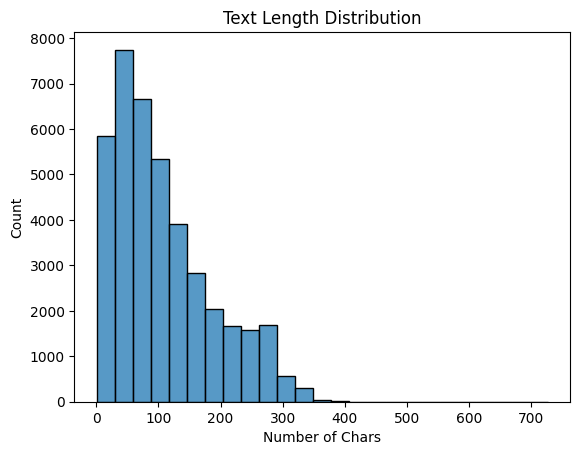

In [187]:
# visualizing how long the actual input sentences are, which we observe is roughly 100 characters on average...
trainingData["textLen"] = trainingData["im getting on borderlands and i will murder you all ,"].apply(len)

# summary...
print(trainingData["textLen"].describe())

# plotting...
sns.histplot(trainingData["textLen"], bins=25)
plt.title("Text Length Distribution")
plt.xlabel("Number of Chars")
plt.show()

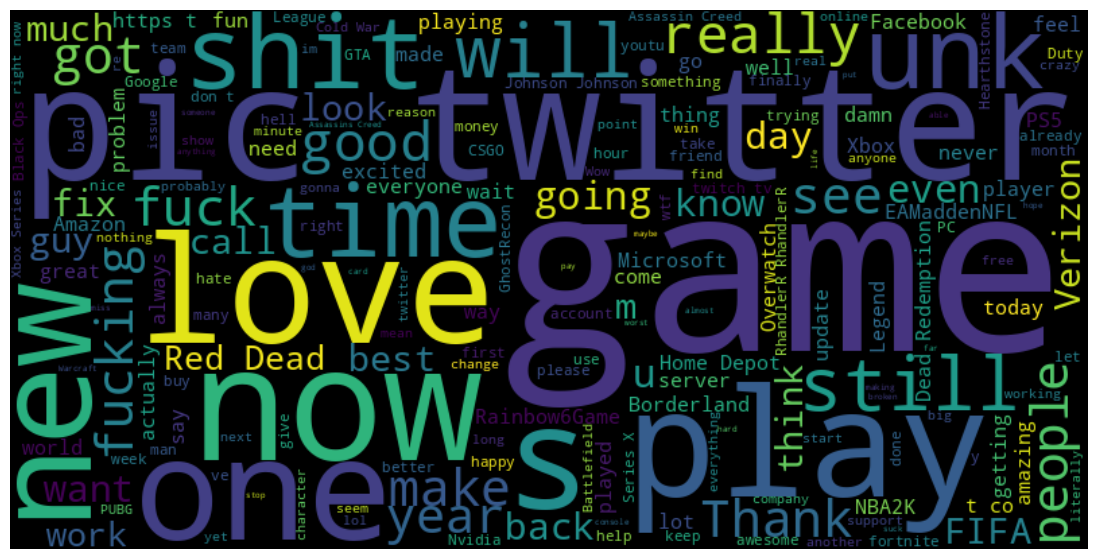

In [188]:
# creating a word cloud from the entire sentences...
allWords = " ".join(trainingData["im getting on borderlands and i will murder you all ,"])
wordcloud = WordCloud(width=800, height=400).generate(allWords)

plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [189]:
# finding the most common words from the entire sentences...
allWords = " ".join(trainingData["im getting on borderlands and i will murder you all ,"]).split()
print(Counter(allWords).most_common(20))

[('the', 21931), ('I', 16312), ('to', 15664), ('and', 14164), ('a', 12260), ('is', 10180), ('of', 10077), ('for', 8067), ('in', 7771), ('@', 6954), ('this', 6386), ('my', 6289), ('it', 6081), ('on', 5984), ('you', 5402), ('that', 5199), ('with', 4679), ('/', 4607), ('game', 4339), ('.', 3909)]


1.1...

first, we must turn the input sentences from each data observations into a format that the RNN can use...

In [190]:
allText = trainingData["im getting on borderlands and i will murder you all ,"].tolist()

# splicing each sentence into individual words...
tokens = [text.lower().split() for text in allText]

# merging to one list...
allTokens = [token for sublist in tokens for token in sublist]

# counting freq of each word...
vocab_counter = Counter(allTokens)

# constructing vocab in which every word in every data observation is assigned an integer
# reserve 0 for padding, 1 for unseen word (in testing)...
vocab = {"<PAD>": 0, "<UNK>": 1}
for index, (word, freq) in enumerate(vocab_counter.items(), start=2):
  vocab[word] = index

print(len(vocab))
print(vocab)

39720
{'<PAD>': 0, '<UNK>': 1, 'i': 2, 'am': 3, 'coming': 4, 'to': 5, 'the': 6, 'borders': 7, 'and': 8, 'will': 9, 'kill': 10, 'you': 11, 'all,': 12, 'im': 13, 'getting': 14, 'on': 15, 'borderlands': 16, 'murder': 17, '2': 18, 'me': 19, 'into': 20, 'can': 21, 'so': 22, 'spent': 23, 'a': 24, 'few': 25, 'hours': 26, 'making': 27, 'something': 28, 'for': 29, 'fun.': 30, '.': 31, 'if': 32, "don't": 33, 'know': 34, 'huge': 35, '@borderlands': 36, 'fan': 37, 'maya': 38, 'is': 39, 'one': 40, 'of': 41, 'my': 42, 'favorite': 43, 'characters.': 44, 'decided': 45, 'make': 46, 'myself': 47, 'wallpaper': 48, 'pc.': 49, 'here': 50, 'original': 51, 'image': 52, 'versus': 53, 'creation': 54, 'made': 55, ':)': 56, 'enjoy!': 57, 'pic.twitter.com/mlsi5wf9jg': 58, 'couple': 59, 'doing': 60, 'fun...': 61, 'that': 62, "i'm": 63, '@': 64, 'characters,': 65, 'pc..': 66, "here's": 67, 'picture': 68, 'compared': 69, 'made:)': 70, 'have': 71, 'fun!': 72, 'pic.twitter.com': 73, '/': 74, 'mlsi5wf9jg': 75, 'rhandle

In [191]:
# encoding each data observation into a list of integers to be compatible with RNN...
def encode(text, vocab):
  tokens = text.lower().split()
  ids = [vocab.get(token, vocab["<UNK>"]) for token in tokens]
  return ids

In [192]:
# we observe that most data observations have <30 tokens. thus, we will set our padding max length to 30
# the reason we do this and not pad to the max number of tokens is to save computationally...
trainingData["numTokens"] = trainingData["im getting on borderlands and i will murder you all ,"].apply(lambda x: len(x.split()))

print(trainingData["numTokens"].describe())

count    40232.000000
mean        19.490132
std         14.425414
min          1.000000
25%          8.000000
50%         16.000000
75%         27.000000
max        198.000000
Name: numTokens, dtype: float64


In [193]:
# padding for consistency for each data observation...
def padding(seq, maxLen):
  if len(seq) < maxLen:
    seq += [0] * (maxLen - len(seq))
  else:
    seq = seq[:maxLen]
  return seq

In [194]:
# turning each sentence in each data observation into our padded integer input...

maxLen = 30
trainingData["encoded"] = trainingData["im getting on borderlands and i will murder you all ,"].apply(lambda x: encode(x, vocab))
trainingData["padded"] = trainingData["encoded"].apply(lambda x: padding(x, maxLen))

print(trainingData[["im getting on borderlands and i will murder you all ,", "encoded", "padded"]].head())

  im getting on borderlands and i will murder you all ,  \
0  I am coming to the borders and I will kill you...      
1  im getting on borderlands and i will kill you ...      
2  im coming on borderlands and i will murder you...      
3  im getting on borderlands 2 and i will murder ...      
4  im getting into borderlands and i can murder y...      

                                             encoded  \
0  [2, 3, 4, 5, 6, 7, 8, 2, 9, 10, 11, 12, 0, 0, ...   
1  [13, 14, 15, 16, 8, 2, 9, 10, 11, 12, 0, 0, 0,...   
2  [13, 4, 15, 16, 8, 2, 9, 17, 11, 12, 0, 0, 0, ...   
3  [13, 14, 15, 16, 18, 8, 2, 9, 17, 11, 19, 12, ...   
4  [13, 14, 20, 16, 8, 2, 21, 17, 11, 12, 0, 0, 0...   

                                              padded  
0  [2, 3, 4, 5, 6, 7, 8, 2, 9, 10, 11, 12, 0, 0, ...  
1  [13, 14, 15, 16, 8, 2, 9, 10, 11, 12, 0, 0, 0,...  
2  [13, 4, 15, 16, 8, 2, 9, 17, 11, 12, 0, 0, 0, ...  
3  [13, 14, 15, 16, 18, 8, 2, 9, 17, 11, 19, 12, ...  
4  [13, 14, 20, 16, 8, 2, 21, 17,

In [195]:
# doing the same for validation...

maxLen = 30
validationData["encoded"] = validationData["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"].apply(lambda x: encode(x, vocab))
validationData["padded"] = validationData["encoded"].apply(lambda x: padding(x, maxLen))

print(validationData[["I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣", "encoded", "padded"]].head())

  I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣  \
1  @Microsoft Why do I pay for WORD when it funct...                                                                                                                                                                                                   
2  CSGO matchmaking is so full of closet hacking,...                                                                                                                                                                                                   
4  Hi @EAHelp I’ve had Madeleine McCann in my cel...                                                                                                                                                                                                   
5  Thank

In [196]:
# train test splitting...
# we got test data from the training data, so the vectors are already there for test set...
train, test = train_test_split(trainingData, test_size=0.15, random_state=42)

print(f"train size: {len(train)}\nvalidation size: {len(validationData)}\ntest size: {len(test)}")

train size: 34197
validation size: 542
test size: 6035


now, we turn each data set into a dataloader object, for batching...

In [197]:
class TextDataset(Dataset):
  def __init__(self, X, y):
    self.X = X
    self.y = y

  def __len__(self):
    return len(self.X)

  def __getitem__(self, idx):
    return torch.tensor(self.X[idx], dtype=torch.long), torch.tensor(self.y[idx], dtype=torch.float)

for training...

In [198]:
X_train = train["padded"].tolist()
y_train = train["binOut"].tolist()

print(X_train,y_train)

[[113, 37270, 3942, 127, 161, 534, 42, 12809, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [3962, 5362, 5363, 39, 5369, 6, 5365, 6, 2178, 5366, 252, 5370, 11, 34, 1694, 5371, 5372, 15, 5237, 2854, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [105, 121, 87, 291, 22, 190, 26, 81, 6, 245, 3084, 127, 78, 87, 295, 3082, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [22, 140, 99, 295, 39, 514, 383, 586, 296, 534, 92, 10218, 205, 534, 30095, 8, 14, 19, 92, 3486, 235, 30096, 6488, 155, 29, 178, 1182, 4215, 1058, 16697], [74, 74, 18, 39, 42, 887, 131, 2, 105, 627, 1230, 2086, 559, 8116, 2, 668, 382, 140, 41, 1197, 483, 1553, 198, 40, 1537, 2319, 2487, 0, 0, 0], [2, 91, 5, 1005, 110, 6, 198, 16560, 16556, 16706, 3824, 1005, 110, 6, 304, 17491, 31, 6, 915, 295, 268, 531, 17492, 6541, 24, 17349, 17493, 31, 1369, 16560], [87, 260, 5, 235, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [42, 79, 20984, 41, 20985, 20990, 20987, 125, 11, 5, 178, 1182, 489, 6186, 19,

In [199]:
train_dataset = TextDataset(X_train, y_train)

train_loader = DataLoader(
  train_dataset,
  batch_size=32,
  shuffle=True
)

for validation...

In [200]:
X_val = validationData["padded"].tolist()
y_val = validationData["binOut"].tolist()

print(X_val,y_val)

[[8800, 233, 352, 2, 365, 29, 4904, 553, 127, 22380, 22, 3545, 15, 42, 22381, 22382, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [14397, 7960, 39, 22, 932, 41, 15221, 15222, 300, 24, 2327, 3146, 327, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [829, 18090, 3459, 86, 30034, 30035, 81, 42, 30036, 29, 6, 2058, 1309, 1395, 8, 6, 717, 30037, 1768, 284, 11374, 4217, 2, 78, 1507, 161, 92, 10218, 7931, 256], [125, 11, 35430, 198, 7782, 19995, 35431, 81, 6, 9966, 497, 35432, 1, 1369, 1, 35433, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [8138, 14370, 2641, 41, 16141, 183, 1437, 32321, 32322, 2, 627, 296, 147, 4902, 15, 129, 131, 762, 39, 6, 32323, 1, 1, 1, 1, 1, 1, 0, 0, 0], [42, 1098, 167, 17718, 81, 16555, 16556, 16563, 534, 826, 1015, 110, 15669, 2634, 512, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [195, 127, 4632, 653, 1480, 195, 127, 653, 442, 81, 6, 1982, 39, 265, 15, 576, 8426, 29296, 31275, 3611, 851, 5807, 31276, 1442, 7469, 5697, 1638, 31277, 0, 0], [6, 8341, 11110, 18, 3997

In [201]:
val_dataset = TextDataset(X_train, y_train)

val_loader = DataLoader(
  val_dataset,
  batch_size=32,
  shuffle=True
)

for test...

In [202]:
X_test = test["padded"].tolist()
y_test = test["binOut"].tolist()

print(X_test,y_test)

[[2276, 9094, 22, 190, 1829, 1258, 41, 20925, 461, 1197, 5, 921, 18994, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [12891, 41, 6, 4377, 632, 902, 281, 4453, 12983, 12987, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [63, 3329, 5, 3330, 8627, 8787, 24, 26264, 26265, 5, 26266, 5, 1639, 8777, 5918, 497, 16396, 29, 79, 15539, 19085, 4841, 189, 11, 21, 26286, 26268, 5797, 26269, 26270], [113, 1737, 531, 1505, 6, 8485, 2137, 8332, 38806, 8, 38807, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [495, 4972, 1174, 39070, 95, 83, 24, 19253, 39071, 39073, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [627, 127, 31, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [93, 1707, 1167, 8627, 11043, 5314, 188, 9198, 450, 23734, 15, 788, 16248, 26227, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [64, 19240, 157, 1115, 1174, 19238, 8849, 230, 1737, 8042, 3952, 6, 1479, 39, 2298, 3389, 2, 86, 22, 140, 295, 60, 147, 927,

In [203]:
test_dataset = TextDataset(X_test, y_test)

test_loader = DataLoader(
  test_dataset,
  batch_size=32,
  shuffle=True
)

The problem I am solving is sentiment analysis in which it takes a sentence from Twitter and then outputs whether it is positive (1) or negative (0). This is binary classification problem, so we know there is only one output. Furthermore, the sentence is broken apart into each word and relies on sequence, sicne the ordering of each word affects sentiment. This is why a RNN is even required, as well as the fact that there are many input layers to represent the context seen beforehand.

We need embedding layer to map each word in the input to a vector representation. The nn.RNN layer uses a tanh actiavtion function by default. We are concerned with the final time step, which we then call our sigmoid function on, to obtain either a 0 or 1, since this is binary classification problem.

pipeline:
Embedding → RNN → Final timestep → FC → Sigmoid


In addition, the evaluation metrics I chose to use were raw accuracy, a confusion matrix, and then the classification report. The broad amount of evaluation metrics allows us to observe not only the accuracy of the model, but if we are more prone to FN or FP.

In [240]:
# standard RNN...
class myRNN(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers):
    super(myRNN, self).__init__()
    # transforming input into vector representation...
    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    self.rnn = nn.RNN(embedding_dim, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()
    self.num_layers = num_layers
    self.hidden_size = hidden_size

  def forward(self, x):
    x = self.embedding(x)
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

    out, _ = self.rnn(x, h0)

    # get last time step since this is many to one architecture...
    out = out[:, -1, :]

    # classifying...
    out = self.fc(out)
    out = self.sigmoid(out)

    return out


In [241]:
# initializing RNN...
vocab_size = len(vocab)
embedding_dim = 50
hidden_size = 64
num_layers = 1

model = myRNN(vocab_size, embedding_dim, hidden_size, num_layers)

In [242]:
# we use BCELoss because this is binary classification...
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

train_losses = []
val_losses = []

for epoch in range(num_epochs):

  # training...
  model.train()
  total_loss = 0
  correct = 0
  total = 0
  total_train_loss = 0

  for inputs, labels in train_loader:
    optimizer.zero_grad()

    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    # total_loss += loss.item() * inputs.size(0)
    total_train_loss += loss.item()

    preds = (outputs >= 0.5).float()
    correct += (preds == labels).sum().item()
    total += labels.size(0)

  # avg_loss = total_loss / total
  acc = correct / total
  avg_train_loss = total_train_loss / len(train_loader)
  train_losses.append(avg_train_loss)


  print(f"Epoch {epoch+1}/{num_epochs}:")
  print(f"Train Loss: {avg_train_loss:.4f} — Train Acc: {acc:.4f}")


  # validation...
  model.eval()
  val_loss = 0
  val_correct = 0
  val_total = 0
  total_val_loss = 0

  y_true = []
  y_pred = []

  with torch.no_grad():
    for inputs, labels in val_loader:

      outputs = model(inputs).squeeze()
      loss = criterion(outputs, labels)

      val_loss += loss.item() * inputs.size(0)
      preds = (outputs >= 0.5).float()
      val_correct += (preds == labels).sum().item()
      val_total += labels.size(0)

      y_true.extend(labels.cpu().numpy())
      y_pred.extend(preds.cpu().numpy())

      total_val_loss += loss.item()


  avg_val_loss = val_loss / val_total
  val_losses.append(avg_val_loss)

  val_acc = val_correct / val_total

  print(f"Val Loss: {avg_val_loss:.4f} — Val Acc: {val_acc:.4f}\n")

  print("Confusion Matrix:")
  cm = confusion_matrix(y_true, y_pred)
  print(cm)

  print("\nEvaluation Metrics:")
  print(classification_report(y_true, y_pred))
  print("\n\n")

Epoch 1/5:
Train Loss: 0.6886 — Train Acc: 0.5299
Val Loss: 0.6743 — Val Acc: 0.5413

Confusion Matrix:
[[ 4744 13228]
 [ 2457 13768]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       0.66      0.26      0.38     17972
         1.0       0.51      0.85      0.64     16225

    accuracy                           0.54     34197
   macro avg       0.58      0.56      0.51     34197
weighted avg       0.59      0.54      0.50     34197




Epoch 2/5:
Train Loss: 0.6635 — Train Acc: 0.5593
Val Loss: 0.6322 — Val Acc: 0.5813

Confusion Matrix:
[[ 4621 13351]
 [  968 15257]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       0.83      0.26      0.39     17972
         1.0       0.53      0.94      0.68     16225

    accuracy                           0.58     34197
   macro avg       0.68      0.60      0.54     34197
weighted avg       0.69      0.58      0.53     34197




Epoch 3/5:
Train Loss: 0.646

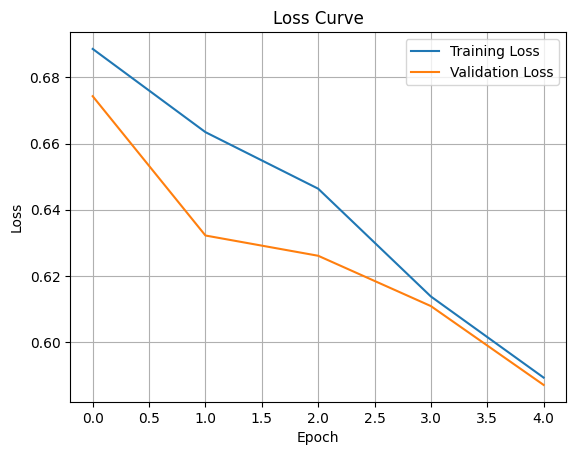

In [243]:
# plotting loss...
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')

plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()

In [207]:
# testing...
model.eval()

test_loss = 0
test_correct = 0
test_total = 0

y_true = []
y_pred = []

with torch.no_grad():
  for inputs, labels in test_loader:

    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)

    test_loss += loss.item() * inputs.size(0)

    preds = (outputs >= 0.5).float()
    test_correct += (preds == labels).sum().item()
    test_total += labels.size(0)

    y_true.extend(labels.cpu().numpy())
    y_pred.extend(preds.cpu().numpy())

avg_test_loss = test_loss / test_total
test_acc = test_correct / test_total

print(f"Test Loss: {avg_test_loss:.4f} — Test Acc: {test_acc:.4f}\n")

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

print("\nEvaluation Metrics:")
print(classification_report(y_true, y_pred))

Test Loss: 0.6534 — Test Acc: 0.5670

Confusion Matrix:
[[3035  159]
 [2454  387]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       0.55      0.95      0.70      3194
         1.0       0.71      0.14      0.23      2841

    accuracy                           0.57      6035
   macro avg       0.63      0.54      0.46      6035
weighted avg       0.63      0.57      0.48      6035



Part2...

GRU implementation...

In [244]:
# GRU...
class myGRU(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers):
    super(myGRU, self).__init__()
    # transforming input into vector representation...
    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    self.rnn = nn.GRU(embedding_dim, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()
    self.num_layers = num_layers
    self.hidden_size = hidden_size

  def forward(self, x):
    x = self.embedding(x)
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

    out, _ = self.rnn(x, h0)

    # get last time step since this is many to one architecture...
    out = out[:, -1, :]

    # classifying...
    out = self.fc(out)
    out = self.sigmoid(out)

    return out


In [245]:
# initializing GRU...
vocab_size = len(vocab)
embedding_dim = 50
hidden_size = 64
num_layers = 1

model = myGRU(vocab_size, embedding_dim, hidden_size, num_layers)

In [246]:
# we use BCELoss because this is binary classification...
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

train_losses = []
val_losses = []

for epoch in range(num_epochs):

  # training...
  model.train()
  total_loss = 0
  correct = 0
  total = 0
  total_train_loss = 0

  for inputs, labels in train_loader:
    optimizer.zero_grad()

    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    # total_loss += loss.item() * inputs.size(0)
    total_train_loss += loss.item()

    preds = (outputs >= 0.5).float()
    correct += (preds == labels).sum().item()
    total += labels.size(0)

  # avg_loss = total_loss / total
  acc = correct / total
  avg_train_loss = total_train_loss / len(train_loader)
  train_losses.append(avg_train_loss)


  print(f"Epoch {epoch+1}/{num_epochs}:")
  print(f"Train Loss: {avg_train_loss:.4f} — Train Acc: {acc:.4f}")


  # validation...
  model.eval()
  val_loss = 0
  val_correct = 0
  val_total = 0
  total_val_loss = 0

  y_true = []
  y_pred = []

  with torch.no_grad():
    for inputs, labels in val_loader:

      outputs = model(inputs).squeeze()
      loss = criterion(outputs, labels)

      val_loss += loss.item() * inputs.size(0)
      preds = (outputs >= 0.5).float()
      val_correct += (preds == labels).sum().item()
      val_total += labels.size(0)

      y_true.extend(labels.cpu().numpy())
      y_pred.extend(preds.cpu().numpy())

      total_val_loss += loss.item()


  avg_val_loss = val_loss / val_total
  val_losses.append(avg_val_loss)

  val_acc = val_correct / val_total

  print(f"Val Loss: {avg_val_loss:.4f} — Val Acc: {val_acc:.4f}\n")

  print("Confusion Matrix:")
  cm = confusion_matrix(y_true, y_pred)
  print(cm)

  print("\nEvaluation Metrics:")
  print(classification_report(y_true, y_pred))
  print("\n\n")

Epoch 1/5:
Train Loss: 0.5707 — Train Acc: 0.6839
Val Loss: 0.3934 — Val Acc: 0.8344

Confusion Matrix:
[[14801  3171]
 [ 2491 13734]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       0.86      0.82      0.84     17972
         1.0       0.81      0.85      0.83     16225

    accuracy                           0.83     34197
   macro avg       0.83      0.84      0.83     34197
weighted avg       0.84      0.83      0.83     34197




Epoch 2/5:
Train Loss: 0.3267 — Train Acc: 0.8621
Val Loss: 0.2106 — Val Acc: 0.9194

Confusion Matrix:
[[16433  1539]
 [ 1216 15009]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.91      0.92     17972
         1.0       0.91      0.93      0.92     16225

    accuracy                           0.92     34197
   macro avg       0.92      0.92      0.92     34197
weighted avg       0.92      0.92      0.92     34197




Epoch 3/5:
Train Loss: 0.194

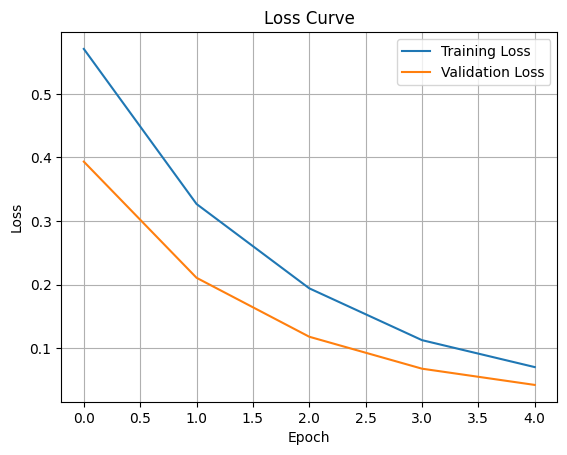

In [247]:
# plotting loss...
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')

plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()

In [213]:
# testing...
model.eval()

test_loss = 0
test_correct = 0
test_total = 0

y_true = []
y_pred = []

with torch.no_grad():
  for inputs, labels in test_loader:

    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)

    test_loss += loss.item() * inputs.size(0)

    preds = (outputs >= 0.5).float()
    test_correct += (preds == labels).sum().item()
    test_total += labels.size(0)

    y_true.extend(labels.cpu().numpy())
    y_pred.extend(preds.cpu().numpy())

avg_test_loss = test_loss / test_total
test_acc = test_correct / test_total

print(f"Test Loss: {avg_test_loss:.4f} — Test Acc: {test_acc:.4f}\n")

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

print("\nEvaluation Metrics:")
print(classification_report(y_true, y_pred))

Test Loss: 0.2186 — Test Acc: 0.9216

Confusion Matrix:
[[2990  204]
 [ 269 2572]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       0.92      0.94      0.93      3194
         1.0       0.93      0.91      0.92      2841

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035



LSTM implementation...

In [220]:
# LSTM...
class myLSTM(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers):
    super(myLSTM, self).__init__()
    # transforming input into vector representation...
    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    self.rnn = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()
    self.num_layers = num_layers
    self.hidden_size = hidden_size

  def forward(self, x):
    x = self.embedding(x)
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

    out, _ = self.rnn(x, (h0, c0))

    # get last time step since this is many to one architecture...
    out = out[:, -1, :]

    # classifying...
    out = self.fc(out)
    out = self.sigmoid(out)

    return out

In [223]:
class myLSTM(nn.Module):
  def __init__(self, vocab_size, embedding_dim, hidden_size, num_layers):
    super(myLSTM, self).__init__()
    # transforming input into vector representation...
    self.embedding = nn.Embedding(vocab_size, embedding_dim)

    self.rnn = nn.LSTM(embedding_dim, hidden_size, num_layers, batch_first=True)
    self.fc = nn.Linear(hidden_size, 1)
    self.sigmoid = nn.Sigmoid()
    self.num_layers = num_layers
    self.hidden_size = hidden_size

  def forward(self, x):
    x = self.embedding(x)
    h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)
    c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_size)

    out, _ = self.rnn(x, (h0, c0))

    # get last time step since this is many to one architecture...
    out = out[:, -1, :]

    # classifying...
    out = self.fc(out)
    out = self.sigmoid(out)
    return out


In [225]:
# initializing LSTM...
vocab_size = len(vocab)
embedding_dim = 50
hidden_size = 64
num_layers = 1

model = myLSTM(vocab_size, embedding_dim, hidden_size, num_layers)

In [248]:
# we use BCELoss because this is binary classification...
criterion = nn.BCELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 5

train_losses = []
val_losses = []

for epoch in range(num_epochs):

  # training...
  model.train()
  total_loss = 0
  correct = 0
  total = 0
  total_train_loss = 0

  for inputs, labels in train_loader:
    optimizer.zero_grad()

    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)

    loss.backward()
    optimizer.step()

    # total_loss += loss.item() * inputs.size(0)
    total_train_loss += loss.item()

    preds = (outputs >= 0.5).float()
    correct += (preds == labels).sum().item()
    total += labels.size(0)

  # avg_loss = total_loss / total
  acc = correct / total
  avg_train_loss = total_train_loss / len(train_loader)
  train_losses.append(avg_train_loss)


  print(f"Epoch {epoch+1}/{num_epochs}:")
  print(f"Train Loss: {avg_train_loss:.4f} — Train Acc: {acc:.4f}")


  # validation...
  model.eval()
  val_loss = 0
  val_correct = 0
  val_total = 0
  total_val_loss = 0

  y_true = []
  y_pred = []

  with torch.no_grad():
    for inputs, labels in val_loader:

      outputs = model(inputs).squeeze()
      loss = criterion(outputs, labels)

      val_loss += loss.item() * inputs.size(0)
      preds = (outputs >= 0.5).float()
      val_correct += (preds == labels).sum().item()
      val_total += labels.size(0)

      y_true.extend(labels.cpu().numpy())
      y_pred.extend(preds.cpu().numpy())

      total_val_loss += loss.item()


  avg_val_loss = val_loss / val_total
  val_losses.append(avg_val_loss)

  val_acc = val_correct / val_total

  print(f"Val Loss: {avg_val_loss:.4f} — Val Acc: {val_acc:.4f}\n")

  print("Confusion Matrix:")
  cm = confusion_matrix(y_true, y_pred)
  print(cm)

  print("\nEvaluation Metrics:")
  print(classification_report(y_true, y_pred))
  print("\n\n")

Epoch 1/5:
Train Loss: 0.0469 — Train Acc: 0.9832
Val Loss: 0.0256 — Val Acc: 0.9922

Confusion Matrix:
[[17834   138]
 [  128 16097]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99     17972
         1.0       0.99      0.99      0.99     16225

    accuracy                           0.99     34197
   macro avg       0.99      0.99      0.99     34197
weighted avg       0.99      0.99      0.99     34197




Epoch 2/5:
Train Loss: 0.0318 — Train Acc: 0.9892
Val Loss: 0.0172 — Val Acc: 0.9948

Confusion Matrix:
[[17858   114]
 [   63 16162]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       1.00      0.99      1.00     17972
         1.0       0.99      1.00      0.99     16225

    accuracy                           0.99     34197
   macro avg       0.99      0.99      0.99     34197
weighted avg       0.99      0.99      0.99     34197




Epoch 3/5:
Train Loss: 0.020

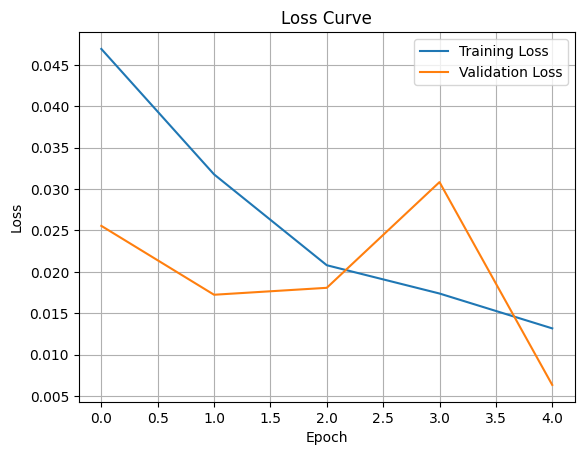

In [249]:
# plotting loss...
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')

plt.title('Loss Curve')
plt.xlabel('Epoch')
plt.ylabel('Loss')

plt.legend()
plt.grid(True)
plt.show()

In [227]:
# testing...
model.eval()

test_loss = 0
test_correct = 0
test_total = 0

y_true = []
y_pred = []

with torch.no_grad():
  for inputs, labels in test_loader:

    outputs = model(inputs).squeeze()
    loss = criterion(outputs, labels)

    test_loss += loss.item() * inputs.size(0)

    preds = (outputs >= 0.5).float()
    test_correct += (preds == labels).sum().item()
    test_total += labels.size(0)

    y_true.extend(labels.cpu().numpy())
    y_pred.extend(preds.cpu().numpy())

avg_test_loss = test_loss / test_total
test_acc = test_correct / test_total

print(f"Test Loss: {avg_test_loss:.4f} — Test Acc: {test_acc:.4f}\n")

print("Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
print(cm)

print("\nEvaluation Metrics:")
print(classification_report(y_true, y_pred))

Test Loss: 0.2186 — Test Acc: 0.9223

Confusion Matrix:
[[2931  263]
 [ 206 2635]]

Evaluation Metrics:
              precision    recall  f1-score   support

         0.0       0.93      0.92      0.93      3194
         1.0       0.91      0.93      0.92      2841

    accuracy                           0.92      6035
   macro avg       0.92      0.92      0.92      6035
weighted avg       0.92      0.92      0.92      6035



From the results of running RNN, GRU, and LSTM, I noticed that both GRU and LSTM had a significantly higher accuracy than the regular RNN. In addition, both GRU and LSTM had very similar thresholds in the classification report, which were very high numbers. On the other hand, the regular RNN seemed to struggle with recall and f1-score of predicting positive sentiment.

One reason for this struggle for regular RNN may be because it is unable of capturing long-term dependencies embedded in these sentiments as well as the fact that they are more prone to vanishing gradients. To contrast, both GRU and LSTM are able to preserve long-term dependencies. This may explain why the stark constrast between the RNN and GRU / LSTM results.

Another thing that is interesting is the fact that GRU has simpler implementation than LSTM, as it does not keep track of cell state. The very minimum difference between the GRU and LSTM results imply that GRU was sufficient enough for the complexity of this sentiment analysis. We observed earlier from our EDA that most sentences had around 30 characters. Perhaps a higher threshold of characters, would illustrate more of the discrepancy between GRU and LSTM performance, with LSTM performance most likely to perform better than GRU in the long term at the cost of heavier implementation.

Part3...

At any given layer of a traditional feed forward network, it takes all inputs from the previous layer, applies a weight and bias and then an activation, then passes it forward to the next layer to do the same. This type of network has inherently no "memory" and thus, no sequence handling. This means there is no hidden state carried across as we step forward. Given the lack of "memory", this network is not capable of solving my task, as sequence matters for sentiment analysis. Even if we used a static vector to keep track of all the words in the sentence, the loss of ordering of words would throw off the classification output.

TASK2 START...

Part1...

The pre-trained word embedding model I have chosen is Word2Vec.

I chose this model via a process of elimination.

From my research, FastText is better for handling out of vocabulary (OOV) words, but at the main cost of using up more memory, since we are also storing subword vectors. For our task, it seems that the embeddings we want to output are from words that come from the user. I do not believe that the advantage of better handling OOV is needed in this case (and does not warrant the larger size it takes), since it is unlikely that a user knows very rare, obscure words. This is why I did not choose FastText.

Next, the big advantage of BERT is that it is good for context-dependent tasks, where the same word can have different meanings. That is, the same word would have different embeddings depending on where the word is in the sentence. The major downside of this is that uses up more memory and also takes more time computationally, making it slower to run. Our task is just to take input words from the user, not sentences. Thus, I do not believe that the context-dependent advantage is of use in this case, and thus I would not like to deal with the disadvantages of this model. This is why I did not choose BERT.

Lastly, it seems that Word2Vec and GloVe are very similar in their functionality, but they are different computationally. However, we are not training these models. We are to already use them pre-trained. The main advantages of these models is that they are good for general similarity tasks and are lightweight. The downsides being that they don't necessarily capture context as well as BERT, but that's ok since we don't need context for the tasks assigned. Thus, I decided to just go with Word2Vec, just since I am more familiar with it, as it was talked about in class.

In [228]:
# loading pretrained model...
model_path = "/content/drive/MyDrive/"
model_path += "GoogleNews-vectors-negative300.bin.gz"
model = KeyedVectors.load_word2vec_format(model_path, binary=True)


my way of handling OOV is the following:
- first, check to see if the word exists in word2vec's vocab
- if not, then first try to spell check and rerun
- if that fails, then try to match to the closest word in word2vec
- finally, if that fails, then set this unknown word to the value of the mean of all embedding vectors in word2vec...

(all of the steps described above can be used on their own, but ive decided to combine them all into one method for OOV checking)

In [229]:
# helper function for dealing with OOV cases...
def getClosestWord(word, vocab):
    # Get list of close matches
    matches = difflib.get_close_matches(word, vocab, n=1)
    if matches:
        return matches[0]
    else:
        return None

In [230]:
def getWordEmbedding(word1, wModel = model):
  # spell checker module that converts unknown word to nearest word (handling typos or unknown words)...
  spell = SpellChecker()

  closest1 = word1
  word1C = word1

  try:
    emWord1 = wModel[word1]


  # unknown word case...
  except:
    # try spellchecking the word...
    try:
      word1C = spell.correction(word1)
      emWord1 = wModel[word1C]

      closest1 = word1C

    # if the corrected word fails, then just set this unknown word to the mean of all embedding vectors
    except:
      if (word1C is None):
        emWord1 = np.mean(wModel.vectors, axis=0)
      else:
        closest1 = getClosestWord(word1C, wModel.key_to_index.keys())

        if (closest1 is None):
          emWord1 = np.mean(wModel.vectors, axis=0)
        else:
          emWord1 = wModel[closest1]

  print(f"Word entered (original): {word1}; Corrected word: {word1C}, Closest word: {closest1}")
  return emWord1

In [231]:
# dynamic input from user...
word1 = input("Please enter first word... ")
word2 = input("Please enter second word... ")

print(getWordEmbedding(word1, model))
print(getWordEmbedding(word2, model))

Please enter first word... cat
Please enter second word... dog
Word entered (original): cat; Corrected word: cat, Closest word: cat
[ 0.0123291   0.20410156 -0.28515625  0.21679688  0.11816406  0.08300781
  0.04980469 -0.00952148  0.22070312 -0.12597656  0.08056641 -0.5859375
 -0.00445557 -0.296875   -0.01312256 -0.08349609  0.05053711  0.15136719
 -0.44921875 -0.0135498   0.21484375 -0.14746094  0.22460938 -0.125
 -0.09716797  0.24902344 -0.2890625   0.36523438  0.41210938 -0.0859375
 -0.07861328 -0.19726562 -0.09082031 -0.14160156 -0.10253906  0.13085938
 -0.00346375  0.07226562  0.04418945  0.34570312  0.07470703 -0.11230469
  0.06738281  0.11230469  0.01977539 -0.12353516  0.20996094 -0.07226562
 -0.02783203  0.05541992 -0.33398438  0.08544922  0.34375     0.13964844
  0.04931641 -0.13476562  0.16308594 -0.37304688  0.39648438  0.10693359
  0.22167969  0.21289062 -0.08984375  0.20703125  0.08935547 -0.08251953
  0.05957031  0.10205078 -0.19238281 -0.09082031  0.4921875   0.03955078

PART2...

Cosine similarity:

We know that vectors have both magnitude and direction. Cosine similarity measures how closely related two words are by comparing the direction of their vectors, ignoring their magnitude. This means it focuses on whether the words share similar semantic contexts, not just how far apart they are in space. By using direction instead of distance, cosine similarity groups words together based on their meaning and usage in the embedding space.

In [232]:
# cosine similarity...
def cosSim(vec1, vec2):
  return dot(vec1, vec2)/(norm(vec1)*norm(vec2))

In [233]:
# dynamic input from user...
word1 = input("Please enter first word... ")
word2 = input("Please enter second word... ")

word1Embed = getWordEmbedding(word1, model)
word2Embed = getWordEmbedding(word2, model)

print(f"\n\ncosine similarity: {cosSim(word1Embed, word2Embed)}")

Please enter first word... ratf
Please enter second word... jersey
Word entered (original): ratf; Corrected word: rate, Closest word: rate
Word entered (original): jersey; Corrected word: jersey, Closest word: jersey


cosine similarity: 0.009977449662983418


Please enter pairs of words separated by a comma - of the form "cat dog\, circle triangle, white black"... cat dog, circle triangle, grene dye
Word entered (original): cat; Corrected word: cat, Closest word: cat
Word entered (original): dog; Corrected word: dog, Closest word: dog
Word entered (original): cat; Corrected word: cat, Closest word: cat
Word entered (original): dog; Corrected word: dog, Closest word: dog
Word entered (original): circle; Corrected word: circle, Closest word: circle
Word entered (original): triangle; Corrected word: triangle, Closest word: triangle
Word entered (original): circle; Corrected word: circle, Closest word: circle
Word entered (original): triangle; Corrected word: triangle, Closest word: triangle
Word entered (original): grene; Corrected word: green, Closest word: green
Word entered (original): dye; Corrected word: dye, Closest word: dye
Word entered (original): grene; Corrected word: green, Closest word: green
Word entered (original): dye; Correcte

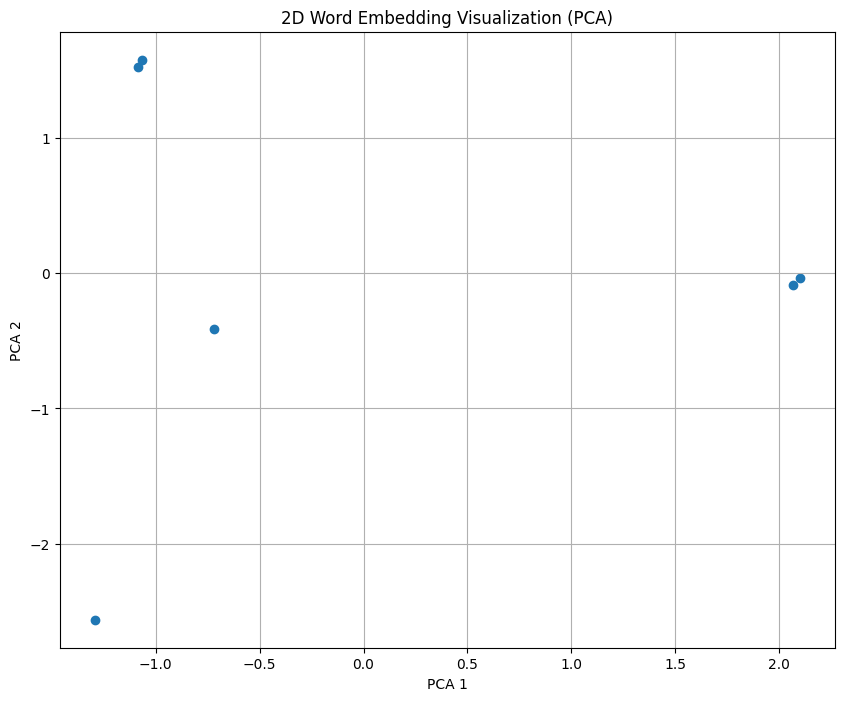

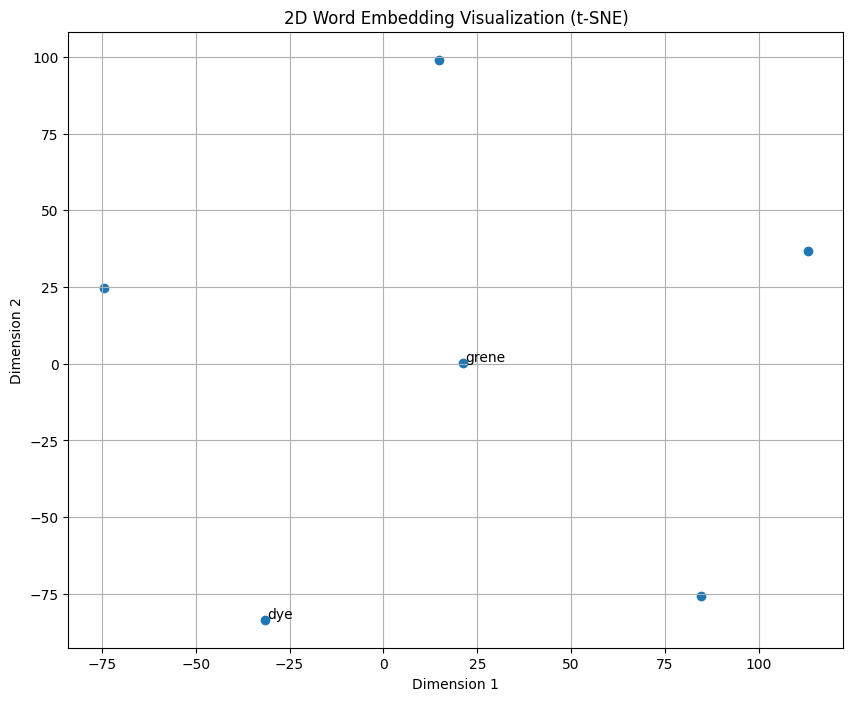

In [234]:
userInput = input("Please enter pairs of words separated by a comma - of the form \"cat dog\, circle triangle, white black\"... ")

getPairs = userInput.split(",")

allPairs = []
allPairsEmbed = []
allWordsEmbed = []


for i in getPairs:
  words = i.strip().split()

  for j in words:
    allWordsEmbed.append(getWordEmbedding(j, model))

  if (len(words) == 2):
    word1 = words[0]
    word2 = words[1]

    allPairs.append((word1, word2))

    word1Embed = getWordEmbedding(word1, model)
    word2Embed = getWordEmbedding(word2, model)

    allPairsEmbed.append((word1Embed, word2Embed))

print(allPairs)

for i in allPairsEmbed:
  print(cosSim(i[0], i[1]))


# pca plot...
pca = PCA(n_components=2)
reduced = pca.fit_transform(allWordsEmbed)

plt.figure(figsize=(10, 8))
x = reduced[:, 0]
y = reduced[:, 1]

plt.scatter(x, y)

for i, word in enumerate(words):
  plt.annotate(word, (x[i]+0.5, y[i]+0.5))

plt.title("2D Word Embedding Visualization (PCA)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.grid(True)
plt.show()


# t-sne plot...
allWordsEmbed = np.array(allWordsEmbed)  # 👈 this fixes it!


tsne = TSNE(n_components=2, random_state=42, perplexity=5)
reduced = tsne.fit_transform(allWordsEmbed)

plt.figure(figsize=(10, 8))
x = reduced[:, 0]
y = reduced[:, 1]

plt.scatter(x, y)

for i, word in enumerate(words):
    plt.annotate(word, (x[i]+0.5, y[i]+0.5))

plt.title("2D Word Embedding Visualization (t-SNE)")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.grid(True)
plt.show()


PART3...

Euclidean distance:

Unlike cosine similarity, which measures how similar two words are based only on the angle between their vectors, Euclidean distance measures the straight-line distance between these vectors instead. This means it considers both the direction and the magnitude of each vector. Using Euclidean distance can reveal how far apart words truly are in the high-dimensional space, so it captures differences in word usage, frequency, or domain that cosine similarity alone might not show. For example, two words might point in similar directions, meaning high cosine similarity, but still be far apart in space due to how frequently they appear or how general or specific they are.

https://arxiv.org/pdf/1301.3781

In [235]:
# euclidean distance dissimiliarity metric...
def euclideanDist(vec1, vec2):
    return norm(vec1 - vec2)

In [236]:
# toggling between cosine and euclidean distance metrics...
def toggleMetric(vec1, vec2, metric):
  if (metric == "cosine"):
    return cosSim(vec1, vec2)

  else:
    return euclideanDist(vec1, vec2)

Word entered (original): king; Corrected word: king, Closest word: king
Word entered (original): queen; Corrected word: queen, Closest word: queen
Word entered (original): man; Corrected word: man, Closest word: man
Word entered (original): royalty; Corrected word: royalty, Closest word: royalty
Word entered (original): princess; Corrected word: princess, Closest word: princess
Word entered (original): rock; Corrected word: rock, Closest word: rock
Word entered (original): soap; Corrected word: soap, Closest word: soap
Word entered (original): castle; Corrected word: castle, Closest word: castle
Word entered (original): white; Corrected word: white, Closest word: white
Word entered (original): black; Corrected word: black, Closest word: black
Word entered (original): one; Corrected word: one, Closest word: one
Word entered (original): two; Corrected word: two, Closest word: two
Word entered (original): grass; Corrected word: grass, Closest word: grass
Word entered (original): tree; Cor

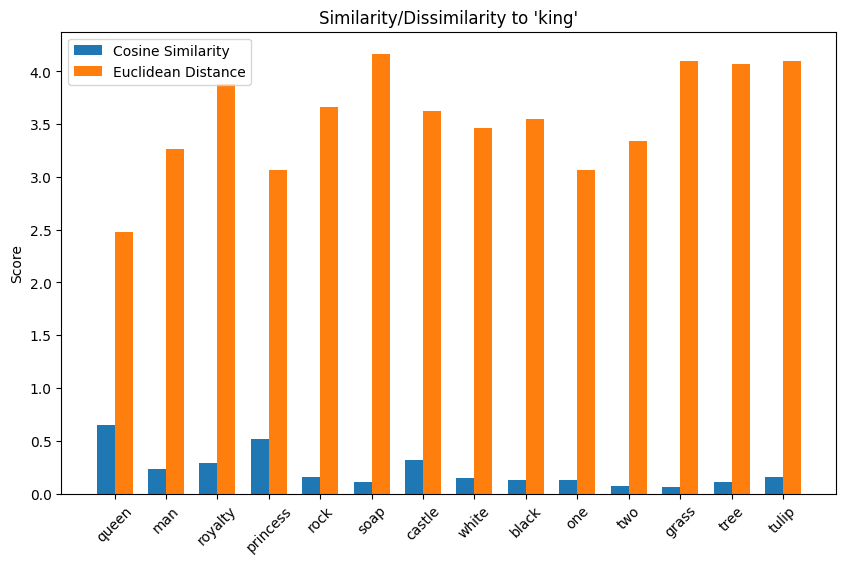

[0.6510956, 0.22942673, 0.28665408, 0.5161998, 0.15652233, 0.11441702, 0.3165581, 0.14604126, 0.13231243, 0.13023983, 0.07157674, 0.06648845, 0.109141365, 0.15482329]
[2.4796925, 3.2687893, 3.8808737, 3.0631, 3.6624913, 4.167357, 3.62027, 3.4589424, 3.548362, 3.0670345, 3.342368, 4.0954256, 4.064822, 4.100204]


In [237]:
# bar graph...
givenWord = "king"
comparisonWords = ["queen", "man", "royalty", "princess", "rock", "soap", "castle", "white", "black", "one", "two", "grass", "tree", "tulip"]

# getting embeddings...
givenWordEmbed = getWordEmbedding(givenWord, model)

allComparisonWordsEmbed = []
for i in comparisonWords:
  allComparisonWordsEmbed.append(getWordEmbedding(i, model))


allScoresCos = []
allScoresDist = []

for i in allComparisonWordsEmbed:
  allScoresCos.append(toggleMetric(givenWordEmbed, i, "cosine"))
  allScoresDist.append(toggleMetric(givenWordEmbed, i, "euclidean"))

x = np.arange(len(comparisonWords))
width = 0.35

fig, ax = plt.subplots(figsize=(10,6))
ax.bar(x - width/2, allScoresCos, width, label='Cosine Similarity')
ax.bar(x + width/2, allScoresDist, width, label='Euclidean Distance')

ax.set_xticks(x)
ax.set_xticklabels(comparisonWords, rotation=45)
ax.set_title(f"Similarity/Dissimilarity to '{givenWord}'")
ax.set_ylabel("Score")
ax.legend()
plt.show()

print(allScoresCos)
print(allScoresDist)

Word entered (original): king; Corrected word: king, Closest word: king
Word entered (original): queen; Corrected word: queen, Closest word: queen
Word entered (original): man; Corrected word: man, Closest word: man
Word entered (original): royalty; Corrected word: royalty, Closest word: royalty
Word entered (original): princess; Corrected word: princess, Closest word: princess
Word entered (original): rock; Corrected word: rock, Closest word: rock
Word entered (original): soap; Corrected word: soap, Closest word: soap
Word entered (original): castle; Corrected word: castle, Closest word: castle
Word entered (original): white; Corrected word: white, Closest word: white
Word entered (original): black; Corrected word: black, Closest word: black
Word entered (original): one; Corrected word: one, Closest word: one
Word entered (original): two; Corrected word: two, Closest word: two
Word entered (original): grass; Corrected word: grass, Closest word: grass
Word entered (original): tree; Cor

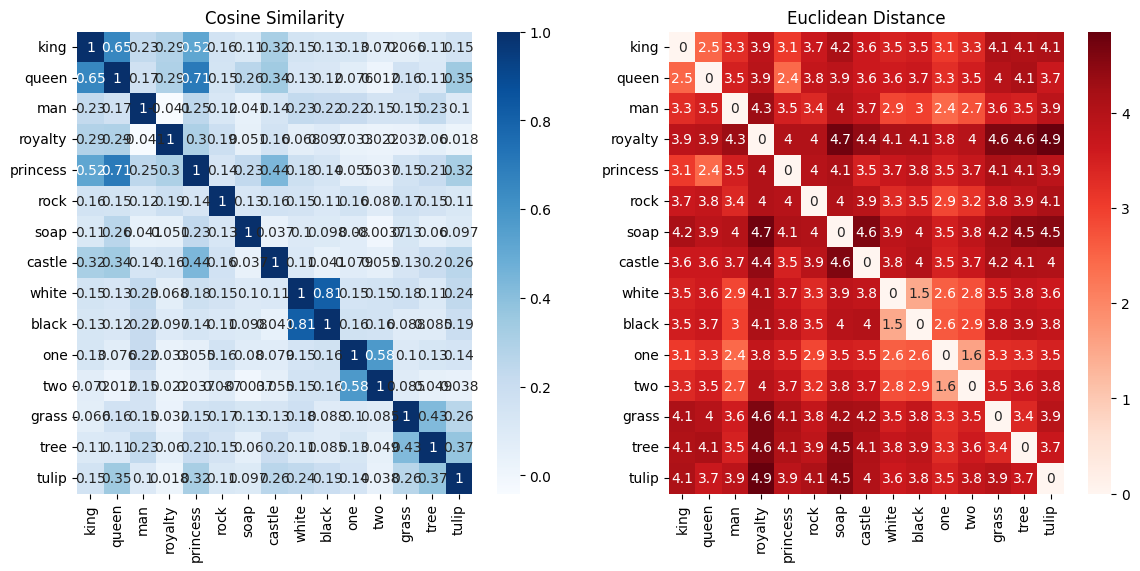

In [238]:
# heatmap...
comparisonWords = ["king", "queen", "man", "royalty", "princess", "rock", "soap", "castle", "white", "black", "one", "two", "grass", "tree", "tulip"]

# getting embeddings...
allComparisonWordsEmbed = []
for i in comparisonWords:
  allComparisonWordsEmbed.append(getWordEmbedding(i, model))


n = len(comparisonWords)

cosineMatrix = np.zeros((n, n))
euclideanMatrix = np.zeros((n, n))

for i in range(n):
  for j in range(n):
    vec1 = allComparisonWordsEmbed[i]
    vec2 = allComparisonWordsEmbed[j]
    cosineMatrix[i, j] = toggleMetric(vec1, vec2, metric="cosine")
    euclideanMatrix[i, j] = toggleMetric(vec1, vec2, metric="euclidean")

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.heatmap(cosineMatrix, annot=True, xticklabels=comparisonWords, yticklabels=comparisonWords, cmap='Blues', ax=axes[0])
axes[0].set_title("Cosine Similarity")

sns.heatmap(euclideanMatrix, annot=True, xticklabels=comparisonWords, yticklabels=comparisonWords, cmap='Reds', ax=axes[1])
axes[1].set_title("Euclidean Distance")

plt.show()